In [1]:
import numpy as np
from tree import Tree

%load_ext autoreload
%autoreload 2

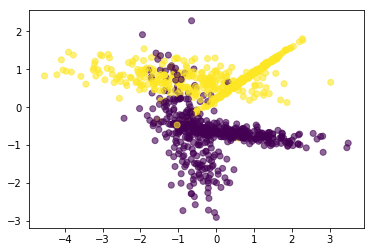

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_auc_score, make_scorer

n_classes = 2
n_features = 2
n_samples = 1000
X, y = make_classification(
    n_classes=n_classes, 
    n_features=n_features, 
    n_informative=n_features, 
    n_redundant=0, 
    n_repeated=0 ,
    n_samples=n_samples, 
    class_sep=.7
)
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.6);

In [3]:
%%time
model = Tree()
model.fit(X, y)

CPU times: user 422 ms, sys: 162 µs, total: 422 ms
Wall time: 423 ms


In [4]:
y_pred = model.predict_proba(X)

In [6]:
model = Tree(max_depth=10)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=10, n_jobs=-1)
scores.mean(), scores.std()

(0.9351488708395834, 0.03092499289734387)

In [ ]:
# 3: (0.8688589781293417, 0.039435738482348236)
# 5: (0.8941568779550095, 0.03564187141951226)
# 10: (0.8886531468780376, 0.03519538501481297)

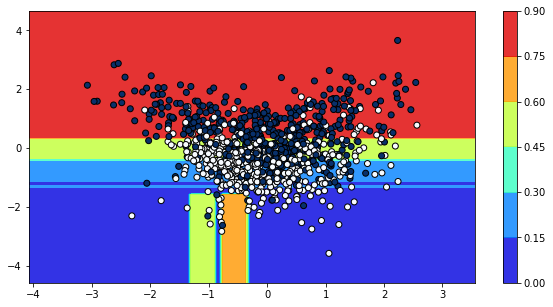

In [8]:
n_grid = 100
xx = np.linspace(X[:,0].min()-1, X[:,0].max()+1, n_grid)
yy = np.linspace(X[:,1].min()-1, X[:,1].max()+1, n_grid).T
xx, yy = np.meshgrid(xx, yy)
grid = np.c_[xx.ravel(), yy.ravel()]

tree.fit(X, y)
y_pred = tree.predict(X)
Z = tree.predict(grid).reshape((n_grid, n_grid))

fig, ax = plt.subplots(figsize=(10,5))
contour = ax.contourf(xx, yy, Z, cmap=plt.cm.jet, alpha=.8)
ax.scatter(X[:, 0], X[:, 1], marker='o', c=y, cmap=plt.cm.Blues, edgecolor='k')
plt.colorbar(contour);